Name: Aditya Gujar <br>
USN: 2448505 <br>
Subject: SPR <br>
Lab-6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

len1 = len(vector1)
len2 = len(vector2)

vector1, vector2


(array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2]),
 array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1]))

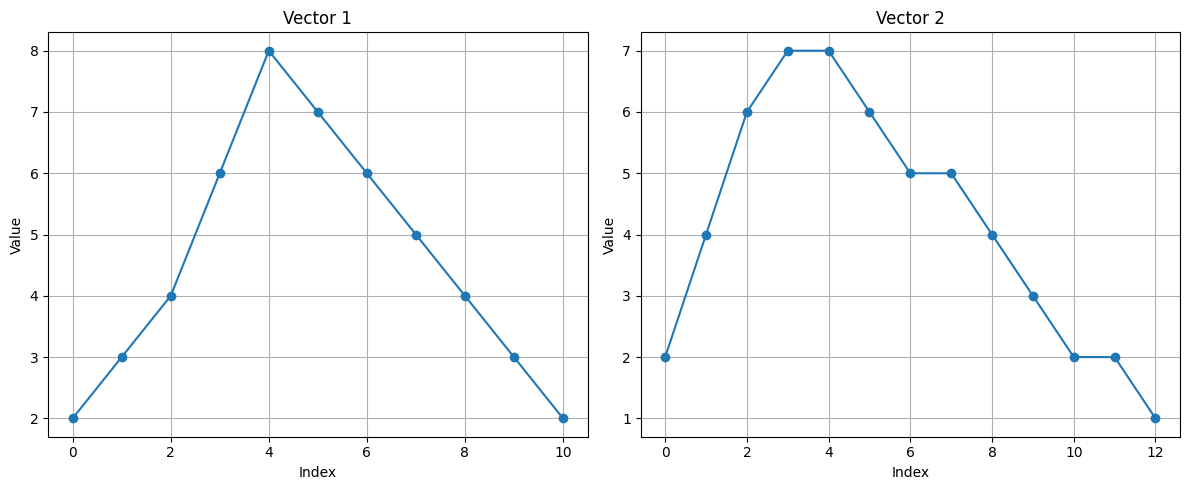

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(vector1, marker='o')
plt.title("Vector 1")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(vector2, marker='o')
plt.title("Vector 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
def dtw(v1, v2):
    n = len(v1)
    m = len(v2)

    # Initialize cost matrix
    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0

    # Fill matrix
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(v1[i-1] - v2[j-1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i-1, j],     # insertion
                dtw_matrix[i, j-1],     # deletion
                dtw_matrix[i-1, j-1]    # match
            )
    return dtw_matrix


In [ ]:
dtw_matrix = dtw(vector1, vector2)
dtw_matrix


array([[ 0., inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf],
       [inf,  0.,  2.,  6., 11., 16., 20., 23., 26., 28., 29., 29., 29.,
        30.],
       [inf,  1.,  1.,  4.,  8., 12., 15., 17., 19., 20., 20., 21., 22.,
        24.],
       [inf,  3.,  1.,  3.,  6.,  9., 11., 12., 13., 13., 14., 16., 18.,
        21.],
       [inf,  7.,  3.,  1.,  2.,  3.,  3.,  4.,  5.,  7., 10., 14., 18.,
        23.],
       [inf, 13.,  7.,  3.,  2.,  3.,  5.,  6.,  7.,  9., 12., 16., 20.,
        25.],
       [inf, 18., 10.,  4.,  2.,  2.,  3.,  5.,  7., 10., 13., 17., 21.,
        26.],
       [inf, 22., 12.,  4.,  3.,  3.,  2.,  3.,  4.,  6.,  9., 13., 17.,
        22.],
       [inf, 25., 13.,  5.,  5.,  5.,  3.,  2.,  2.,  3.,  5.,  8., 11.,
        15.],
       [inf, 27., 13.,  7.,  8.,  8.,  5.,  3.,  3.,  2.,  3.,  5.,  7.,
        10.],
       [inf, 28., 14., 10., 11., 12.,  8.,  5.,  5.,  3.,  2.,  3.,  4.,
         6.],
       [inf, 28., 16., 14., 15., 16., 12., 

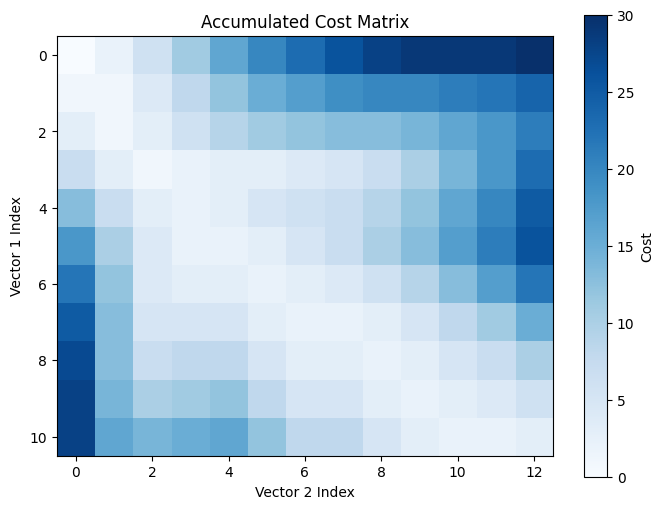

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(dtw_matrix[1:, 1:], cmap='Blues', interpolation='nearest')
plt.title("Accumulated Cost Matrix")
plt.xlabel("Vector 2 Index")
plt.ylabel("Vector 1 Index")
plt.colorbar(label="Cost")
plt.show()


In [ ]:
def dtw_path(dtw_matrix):
    i, j = np.array(dtw_matrix.shape) - 1
    path = [(i-1, j-1)]

    while i > 1 or j > 1:
        options = [
            (i-1, j-1),
            (i-1, j),
            (i, j-1)
        ]
        costs = [dtw_matrix[p] for p in options]
        min_cost_idx = np.argmin(costs)
        i, j = options[min_cost_idx]
        path.append((i-1, j-1))

    path.reverse()
    return path


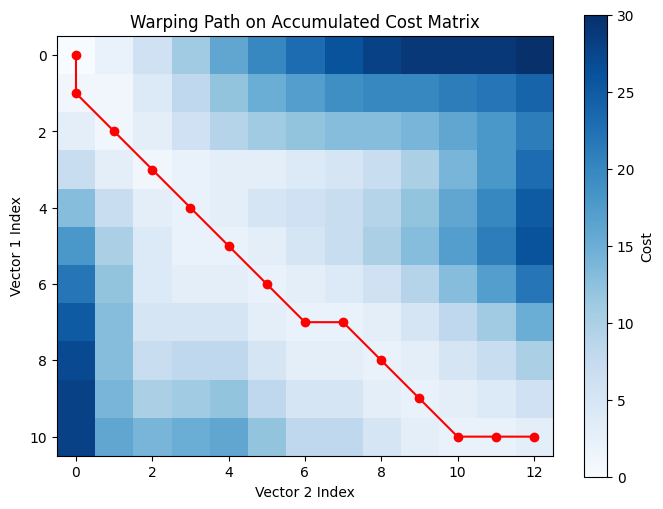

In [ ]:
path = dtw_path(dtw_matrix)
path_x, path_y = zip(*path)

plt.figure(figsize=(8,6))
plt.imshow(dtw_matrix[1:, 1:], cmap='Blues', interpolation='nearest')
plt.plot(path_y, path_x, '-o', color='red')
plt.title("Warping Path on Accumulated Cost Matrix")
plt.xlabel("Vector 2 Index")
plt.ylabel("Vector 1 Index")
plt.colorbar(label="Cost")
plt.show()


In [ ]:
dtw_distance = dtw_matrix[-1, -1]
print("DTW Distance between Vector 1 and Vector 2:", round(dtw_distance, 2))


DTW Distance between Vector 1 and Vector 2: 3.0
